### Import the packages

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as pyplot
import string
import cv2
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/"))
dim = 500

['Testing', 'Training']


In [3]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Testing']
    if not k_fold:
        path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type, " images of " , tomatoes[i])
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

### Training data

#### Initialize the tomatoes on the training data

In [4]:
tomatoes=['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Testing', print_n=True, k_fold=False)

['Mobile_captured_red_tomatoes', 'Mobile_captured_green_tomatoes']
There are  150   Training  images of  Mobile_captured_red_tomatoes
There are  150   Training  images of  Mobile_captured_green_tomatoes
There are  100   Testing  images of  Mobile_captured_red_tomatoes
There are  100   Testing  images of  Mobile_captured_green_tomatoes


#### Use K-fold on the training data

In [5]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Scaling the images using Standard Scaler on the training data

In [6]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15,15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axes = pyplot.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axes[i, j].axis('off')
            axes[i, j].imshow(images[n])
            n += 1   

### 1) Trained Mobile Captured Red Tomatoes

Mobile_captured_red_tomatoes


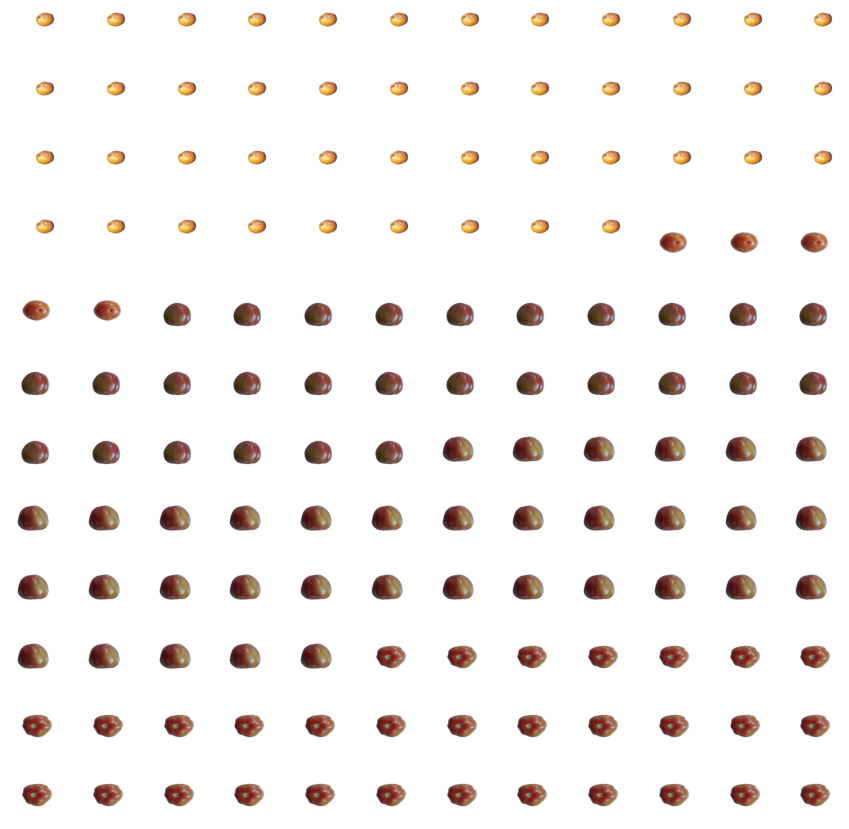

In [8]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:144], 12, 12)

### 2) Trained Mobile Captured Green Tomatoes

Mobile_captured_green_tomatoes


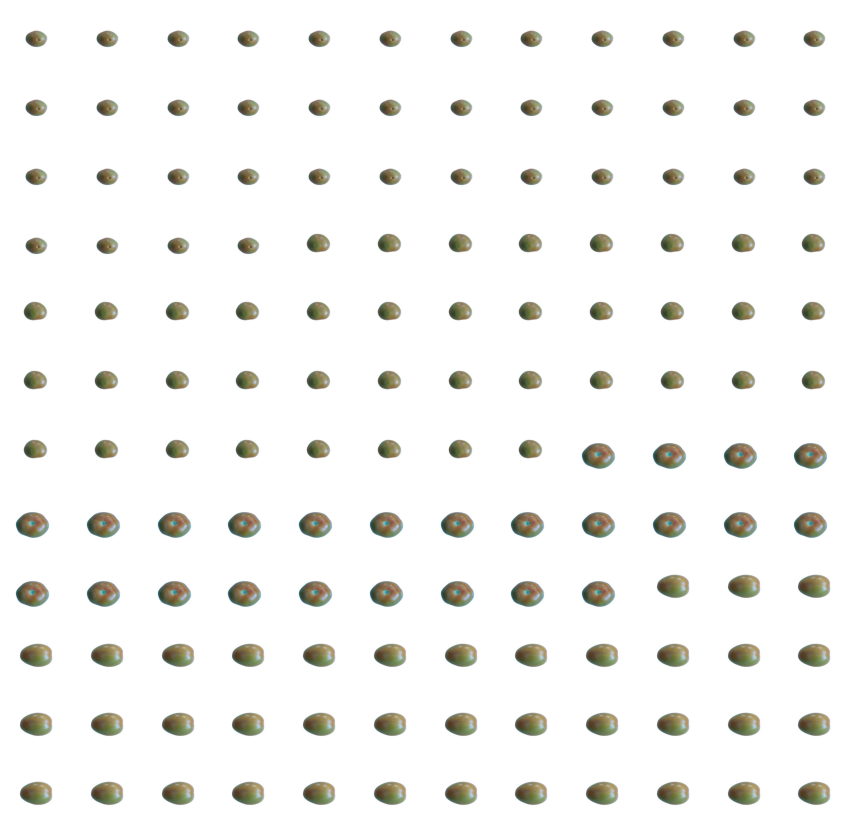

In [9]:
print(tomatoes[y_train[150]])
plot_image_grid(X_train[150:294], 12, 12)

## 1) Using SVM for Classification on the training data

#### Define the model and evaluate all the metrics

In [10]:
tomatoes = ['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Training')
X_test, y_test = getTomatoes(tomatoes, 'Testing')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

## 1. Linear SVM

In [11]:
# Linear SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='linear',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Linear SVM = 100.0%
Precision with Linear SVM = 100.0%
Recall with Linear SVM = 100.0%
F1_score with Linear SVM = 100.0%


col_0,0,1
row_0,,
0,100,0
1,0,100


In [12]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("SVM: precision = ",svm_precision)
print("SVM: recall = ",svm_recall)

SVM: precision =  [1. 1. 1. 1.]
SVM: recall =  [1.   0.5  0.05 0.  ]


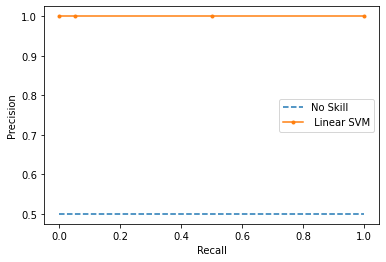

In [13]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label=' Linear SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [14]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Linear SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('Linear_svm_fpr =',svm_fpr)
print('Linear_svm_tpr =',svm_tpr)

No Skill: ROC AUC = 0.5
Linear SVM : ROC AUC = 1.0
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
Linear_svm_fpr = [0.   0.   0.   0.   0.2  0.65 1.  ]
Linear_svm_tpr = [0.   0.05 0.5  1.   1.   1.   1.  ]


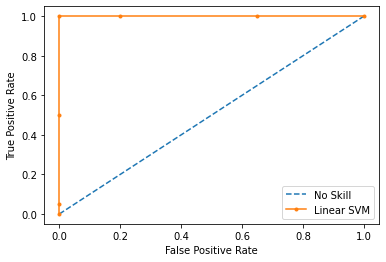

In [15]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Linear SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2. RBF SVM

In [16]:
# Kernel RBF SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='rbf',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel RBF SVM = 97.5%
Precision with Kernel RBF SVM = 97.6%
Recall with Kernel RBF SVM = 97.5%
F1_score with Kernel RBF SVM = 97.5%


col_0,0,1
row_0,,
0,95,0
1,5,100


In [17]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("RBF SVM: precision = ",svm_precision)
print("RBF SVM: recall = ",svm_recall)

RBF SVM: precision =  [0.95238095 0.90909091 1.         1.         1.        ]
RBF SVM: recall =  [1.   0.5  0.5  0.05 0.  ]


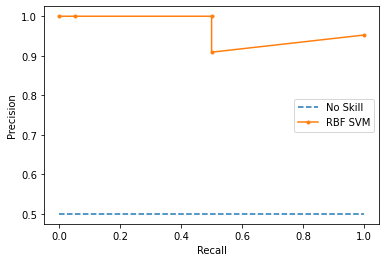

In [18]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [19]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('RBF SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('RBF_svm_fpr =',svm_fpr)
print('RBF_svm_tpr =',svm_tpr)

No Skill: ROC AUC = 0.5
RBF SVM : ROC AUC = 0.9750000000000001
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
RBF_svm_fpr = [0.   0.   0.   0.05 0.05 0.35 0.8  1.  ]
RBF_svm_tpr = [0.   0.05 0.5  0.5  1.   1.   1.   1.  ]


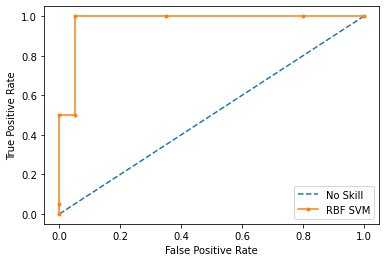

In [20]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 3. Poly SVM

In [21]:
# Kernel Poly SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='poly',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel Poly SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel Poly SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel Poly SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel Poly SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel Poly SVM = 82.5%
Precision with Kernel Poly SVM = 88.6%
Recall with Kernel Poly SVM = 82.5%
F1_score with Kernel Poly SVM = 83.1%


col_0,0,1
row_0,,
0,65,0
1,35,100


In [22]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Poly SVM: precision = ",svm_precision)
print("Poly SVM: recall = ",svm_recall)

Poly SVM: precision =  [0.8        0.66666667 0.71428571 0.76923077 0.83333333 0.90909091
 1.         1.         1.        ]
Poly SVM: recall =  [1.   0.5  0.5  0.5  0.5  0.5  0.5  0.05 0.  ]


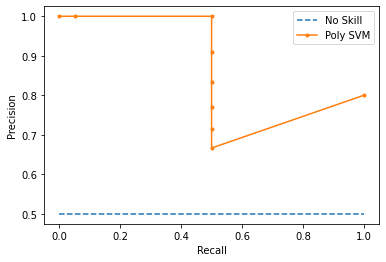

In [23]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [24]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Poly SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('Poly_svm_fpr =',svm_fpr)
print('Poly_svm_tpr =',svm_tpr)

No Skill: ROC AUC = 0.5
Poly SVM : ROC AUC = 0.875
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
Poly_svm_fpr = [0.   0.   0.   0.25 0.25 0.5  0.95 1.  ]
Poly_svm_tpr = [0.   0.05 0.5  0.5  1.   1.   1.   1.  ]


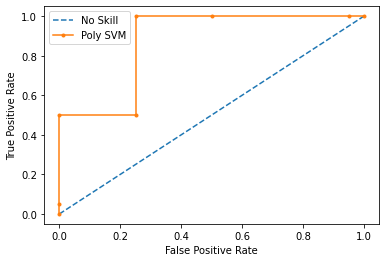

In [25]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4. Sigmoid SVM

In [26]:
# Sigmoid SVM
model = SVC(C=0.1,degree=1,random_state=0,gamma='auto',kernel='sigmoid',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Sigmoid SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Sigmoid SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Sigmoid SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Sigmoid SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Sigmoid SVM = 80.0%
Precision with Sigmoid SVM = 88.0%
Recall with Sigmoid SVM = 80.0%
F1_score with Sigmoid SVM = 80.8%


col_0,0,1
row_0,,
0,60,0
1,40,100


In [27]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Sigmoid SVM: precision = ",svm_precision)
print("Sigmoid SVM: recall = ",svm_recall)

Sigmoid SVM: precision =  [0.8        0.66666667 0.71428571 0.76923077 0.83333333 0.90909091
 1.         1.         1.        ]
Sigmoid SVM: recall =  [1.   0.5  0.5  0.5  0.5  0.5  0.5  0.05 0.  ]


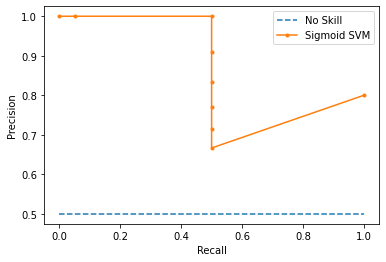

In [28]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [29]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Sigmoid SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('Sigmoid_svm_fpr =',svm_fpr)
print('Sigmoid_svm_tpr =',svm_tpr)

No Skill: ROC AUC = 0.5
Sigmoid SVM : ROC AUC = 0.875
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
Sigmoid_svm_fpr = [0.   0.   0.   0.25 0.25 0.5  0.95 1.  ]
Sigmoid_svm_tpr = [0.   0.05 0.5  0.5  1.   1.   1.   1.  ]


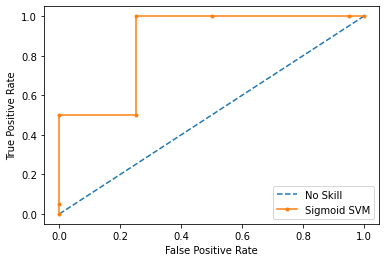

In [30]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2) Using PCA for SVM on the training data

In [31]:
pca = PCA(n_components=1,random_state=0,svd_solver='full')
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [32]:
# Linear SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='linear',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Linear SVM after PCA = 72.5%
Precision with Linear SVM after PCA = 87.6%
Recall with Linear SVM after PCA = 72.5%
F1_score with Linear SVM after PCA = 74.7%


col_0,0,1
row_0,,
0,45,0
1,55,100


In [33]:
# Kernel RBF SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='rbf',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy with Kernel RBF SVM after PCA = 50.0%
Precision with Kernel RBF SVM after PCA = 100.0%
Recall with Kernel RBF SVM after PCA = 50.0%
F1_score with Kernel RBF SVM after PCA = 66.7%


col_0,0,1
row_0,,
0,100,100


In [34]:
# Kernel Poly SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='poly',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel Poly SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel Poly SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel Poly SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel Poly SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel Poly SVM after PCA = 72.5%
Precision with Kernel Poly SVM after PCA = 87.6%
Recall with Kernel Poly SVM after PCA = 72.5%
F1_score with Kernel Poly SVM after PCA = 74.7%


col_0,0,1
row_0,,
0,45,0
1,55,100


In [35]:
# Kernel Sigmoid SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='sigmoid',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel sigmoid SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel sigmoid SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel sigmoid SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel sigmoid SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel sigmoid SVM after PCA = 72.5%
Precision with Kernel sigmoid SVM after PCA = 87.6%
Recall with Kernel sigmoid SVM after PCA = 72.5%
F1_score with Kernel sigmoid SVM after PCA = 74.7%


col_0,0,1
row_0,,
0,45,0
1,55,100


## 3) Hyperparameter Tuning

#### GridSearch CV

In [36]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [37]:
grid = {'C': [0.1],  
              'gamma': [1], 
              'kernel': ['rbf']} 

In [38]:
model_grid = GridSearchCV(SVC(), grid, verbose = 1) 
model_grid.fit(X_train, y_train) 
print(model_grid.best_params_)
print(model_grid.best_estimator_)
grid_predictions = model_grid.predict(X_test) 
print("Predicted value =",grid_predictions)
accuracy = metrics.accuracy_score(grid_predictions, y_test) * 100
print("Accuracy with RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(grid_predictions, y_test,average='weighted') * 100
print("Precision with RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(grid_predictions, y_test,average='weighted') * 100
print("Recall with RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(grid_predictions, y_test,average='weighted') * 100
print("F1_score with RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(grid_predictions,y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)
Predicted value = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy with RBF SVM = 50.0%
Precision with RBF SVM = 100.0%
Recall with RBF SVM = 50.0%
F1_score with RBF SVM = 66.7%


col_0,0,1
row_0,,
0,100,100


In [39]:
print(model_grid.best_score_)

0.9833333333333332


#### RandomizedSearch CV

In [40]:
randomized = {'C': [0.1],  
              'gamma': [1], 
              'kernel': ['rbf']} 

In [41]:
model_randomized = RandomizedSearchCV(SVC(), randomized,verbose = 1) 
model_randomized.fit(X_train, y_train) 
print(model_randomized.best_params_)
print(model_randomized.best_estimator_)
print(model_randomized.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
SVC(C=0.1, gamma=1)
0.9833333333333332


In [42]:
randomized_predictions = model_randomized.predict(X_test) 
print("Predicted value =",randomized_predictions)
accuracy = metrics.accuracy_score(randomized_predictions, y_test) * 100
print("Accuracy with RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(randomized_predictions, y_test,average='weighted') * 100
print("Precision with RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(randomized_predictions, y_test,average='weighted') * 100
print("Recall with RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(randomized_predictions, y_test,average='weighted') * 100
print("F1_score with RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(randomized_predictions,y_test)

Predicted value = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy with RBF SVM = 50.0%
Precision with RBF SVM = 100.0%
Recall with RBF SVM = 50.0%
F1_score with RBF SVM = 66.7%


col_0,0,1
row_0,,
0,100,100


## 4) Using KNN on the training data

In [43]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with K-NN = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with K-NN = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with K-NN = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with K-NN = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with K-NN = 97.5%
Precision with K-NN = 97.6%
Recall with K-NN = 97.5%
F1_score with K-NN = 97.5%


col_0,0,1
row_0,,
0,95,0
1,5,100


In [44]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
knn_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
y_predict=model.predict(X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
# summarize scores
print("KNN: precision = ",knn_precision)
print("KNN: recall = ",knn_recall)

KNN: precision =  [0.95238095 1.        ]
KNN: recall =  [1. 0.]


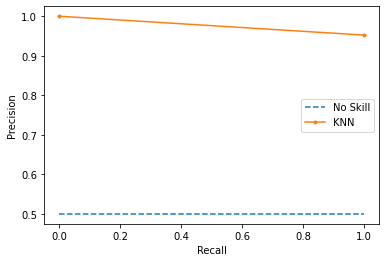

In [45]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(knn_recall, knn_precision, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [46]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
knn_auc=roc_auc_score(y_test,knn_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('KNN : ROC AUC =',knn_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('knn_fpr =',knn_fpr)
print('knn_tpr =',knn_tpr)

No Skill: ROC AUC = 0.5
KNN : ROC AUC = 0.975
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
knn_fpr = [0.   0.05 1.  ]
knn_tpr = [0. 1. 1.]


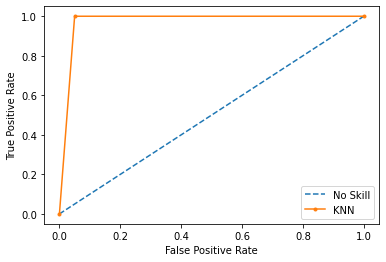

In [47]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 5) Using PCA for K-NN on the training data

In [48]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='minkowski')
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with K-NN after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with K-NN after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with K-NN after PCA  = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with K-NN after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with K-NN after PCA = 67.5%
Precision with K-NN after PCA = 70.6%
Recall with K-NN after PCA  = 67.5%
F1_score with K-NN after PCA = 68.0%


col_0,0,1
row_0,,
0,80,45
1,20,55


## 6) Using Logistic Regression on the training data

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Logistic Regression = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Logistic Regression = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Logistic Regression = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Logistic Regression = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Logistic Regression = 97.5%
Precision with Logistic Regression = 97.6%
Recall with Logistic Regression = 97.5%
F1_score with Logistic Regression = 97.5%


col_0,0,1
row_0,,
0,95,0
1,5,100


LR: precision =  [1. 1. 1. 1.]
LR: recall =  [1.   0.5  0.05 0.  ]


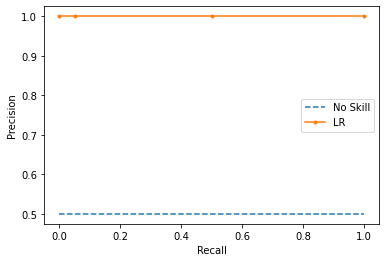

In [51]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
y_predict=model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# summarize scores
print("LR: precision = ",lr_precision)
print("LR: recall = ",lr_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LR')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
LR : ROC AUC = 0.875
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
lr_fpr = [0.   0.   0.   0.   0.3  0.75 1.  ]
lr_tpr = [0.   0.05 0.5  1.   1.   1.   1.  ]


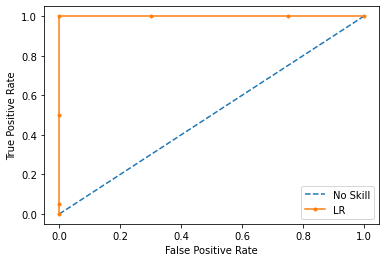

In [52]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('LR : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('lr_fpr =',lr_fpr)
print('lr_tpr =',lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 7) Using ANN on the training data

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
model = MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='adam',alpha=0.0001,batch_size='auto',
                      learning_rate='constant',learning_rate_init=0.001,random_state=0)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with MLP Classifier = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with MLP Classifier = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with MLP Classifier = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with MLP Classifier = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with MLP Classifier = 65.0%
Precision with MLP Classifier = 67.0%
Recall with MLP Classifier = 65.0%
F1_score with MLP Classifier = 65.4%


col_0,0,1
row_0,,
0,75,45
1,25,55


ANN: precision =  [0.74074074 0.61111111 0.64705882 0.6875     0.73333333 0.2
 0.25       1.        ]
ANN: recall =  [1.   0.55 0.55 0.55 0.55 0.05 0.05 0.  ]


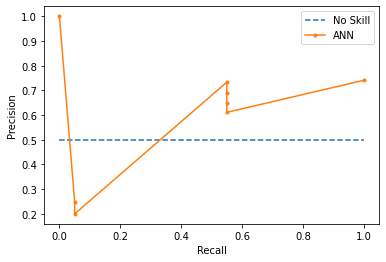

In [55]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
ann_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ann_probs = ann_probs[:, 1]
y_predict=model.predict(X_test)
ann_precision, ann_recall, _ = precision_recall_curve(y_test, ann_probs)
# summarize scores
print("ANN: precision = ",ann_precision)
print("ANN: recall = ",ann_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(ann_recall, ann_precision, marker='.', label='ANN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
ANN : ROC AUC = 0.73875
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
ann_fpr = [0.   0.15 0.2  0.2  0.35 0.35 0.55 1.  ]
ann_tpr = [0.   0.05 0.05 0.55 0.55 1.   1.   1.  ]


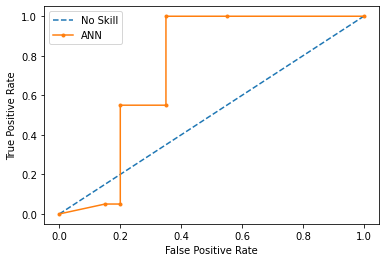

In [56]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
ann_auc=roc_auc_score(y_test,ann_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('ANN : ROC AUC =',ann_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('ann_fpr =',ann_fpr)
print('ann_tpr =',ann_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Testing data

In [57]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Testing']
    if not k_fold:
        path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , tomatoes[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Testing/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

#### Initialize the tomatoes on the testing data

In [58]:
tomatoes=['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Testing', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)

['Mobile_captured_red_tomatoes', 'Mobile_captured_green_tomatoes']
There are  100   TESTING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  100   TESTING  images of  MOBILE_CAPTURED_GREEN_TOMATOES
There are  150   TRAINING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  150   TRAINING  images of  MOBILE_CAPTURED_GREEN_TOMATOES


#### Use k-fold on the testing data

In [59]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Using standard scalar on the testing data

In [60]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 1) Tested Mobile Captured Red tomatoes

Mobile_captured_red_tomatoes


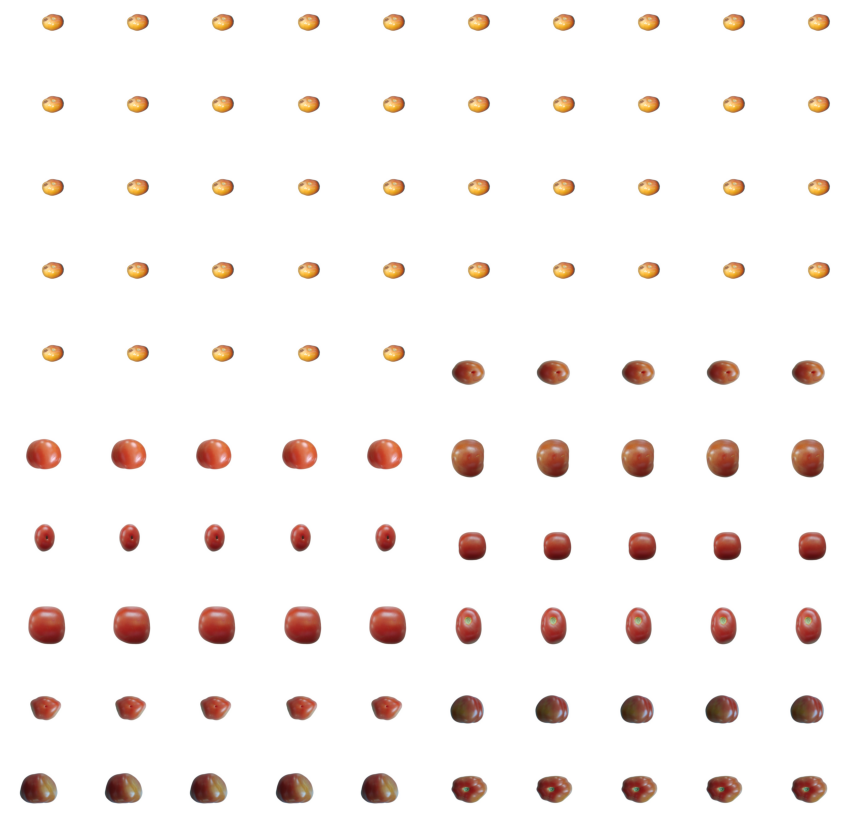

In [61]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:100], 10, 10)

### 2) Tested Mobile Captured Green tomatoes 

Mobile_captured_green_tomatoes


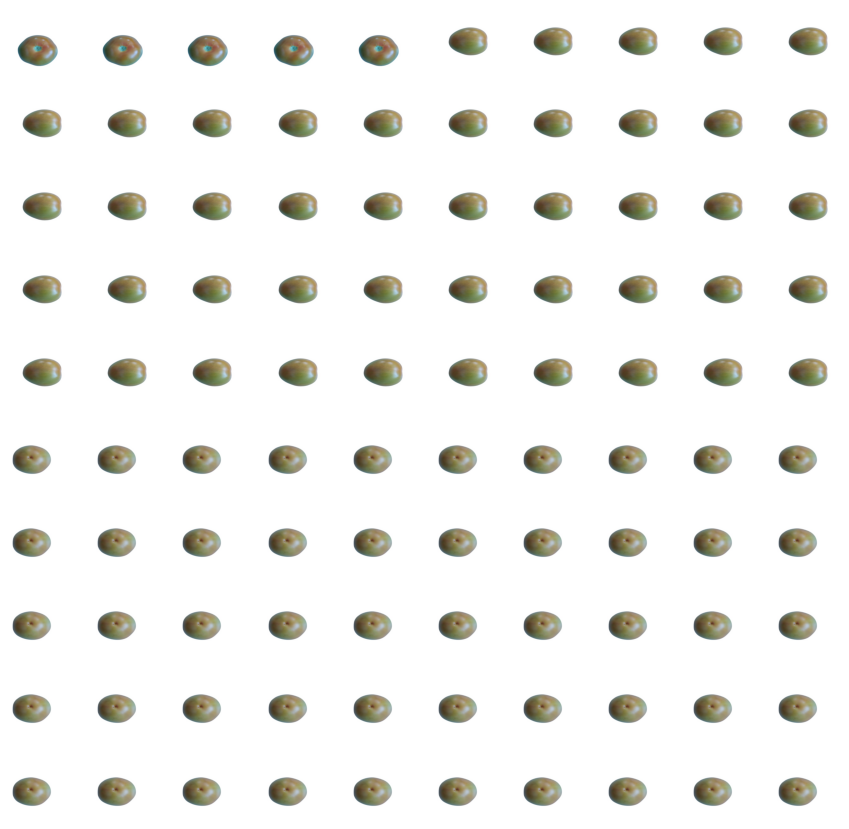

In [62]:
print(tomatoes[y_train[100]])
plot_image_grid(X_train[100:200], 10, 10)

### Classification on the testing data

In [63]:
tomatoes = ['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Testing')
X_test, y_test = getTomatoes(tomatoes, 'Training')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

## 1) Using SVM on the testing data

#### 1. Linear SVM

In [64]:
# Linear SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='linear',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Linear SVM = 73.3%
Precision with Linear SVM = 87.6%
Recall with Linear SVM = 73.3%
F1_score with Linear SVM = 75.4%


col_0,0,1
row_0,,
0,150,80
1,0,70


Linear SVM: precision =  [1. 1. 1. 1. 1.]
Linear SVM: recall =  [1.         0.73333333 0.46666667 0.3        0.        ]


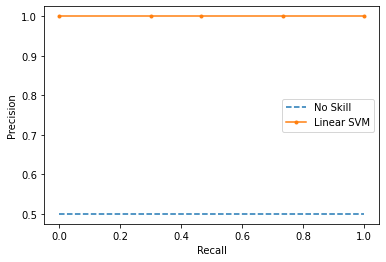

In [65]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Linear SVM: precision = ",svm_precision)
print("Linear SVM: recall = ",svm_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Linear SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
LinearSVM : ROC AUC = 1.0
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
svm_fpr = [0.         0.         0.         0.         0.23333333 0.48
 0.66666667 0.7        1.        ]
svm_tpr = [0.         0.3        0.46666667 1.         1.         1.
 1.         1.         1.        ]


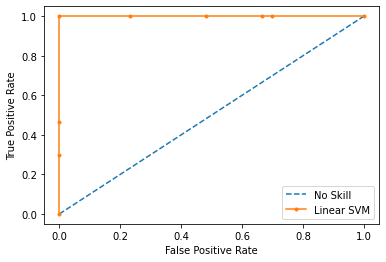

In [66]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('LinearSVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('svm_fpr =',svm_fpr)
print('svm_tpr =',svm_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Linear SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 2. RBF SVM

In [67]:
# Kernel RBF SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='rbf',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Kernel RBF SVM = 61.0%
Precision with Kernel RBF SVM = 64.0%
Recall with Kernel RBF SVM = 61.0%
F1_score with Kernel RBF SVM = 61.6%


col_0,0,1
row_0,,
0,73,40
1,77,110


RBF SVM: precision =  [0.66079295 0.58823529 0.6043956  0.54140127 0.38461538 0.5625
 1.         1.        ]
RBF SVM: recall =  [1.         0.73333333 0.73333333 0.56666667 0.3        0.3
 0.3        0.        ]


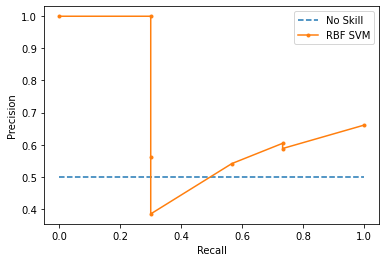

In [68]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("RBF SVM: precision = ",svm_precision)
print("RBF SVM: recall = ",svm_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
RBF SVM : ROC AUC = 0.6962222222222223
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
RBF_svm_fpr = [0.         0.         0.23333333 0.23333333 0.48       0.48
 0.51333333 0.51333333 0.7        1.        ]
RBF_svm_tpr = [0.         0.3        0.3        0.46666667 0.46666667 0.73333333
 0.73333333 1.         1.         1.        ]


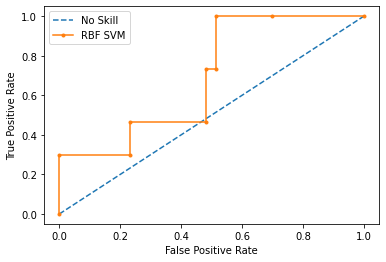

In [76]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('RBF SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('RBF_svm_fpr =',svm_fpr)
print('RBF_svm_tpr =',svm_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 3. Poly SVM

In [77]:
# Kernel Poly SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='poly',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel poly SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel poly SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel poly SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel poly SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Kernel poly SVM = 65.0%
Precision with Kernel poly SVM = 89.5%
Recall with Kernel poly SVM = 65.0%
F1_score with Kernel poly SVM = 69.9%


col_0,0,1
row_0,,
0,45,0
1,105,150


Poly SVM: precision =  [0.66079295 0.58823529 0.6043956  0.49295775 0.66666667 0.5625
 1.         1.        ]
Poly SVM: recall =  [1.         0.73333333 0.73333333 0.46666667 0.46666667 0.3
 0.3        0.        ]


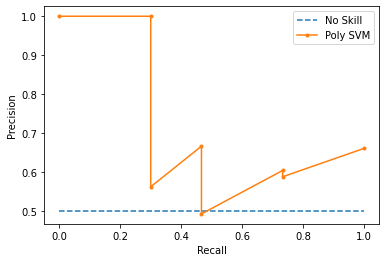

In [78]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Poly SVM: precision = ",svm_precision)
print("Poly SVM: recall = ",svm_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
Poly SVM : ROC AUC = 0.6962222222222223
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
poly_svm_fpr = [0.         0.         0.23333333 0.23333333 0.48       0.48
 0.51333333 0.51333333 0.7        1.        ]
poly_svm_tpr = [0.         0.3        0.3        0.46666667 0.46666667 0.73333333
 0.73333333 1.         1.         1.        ]


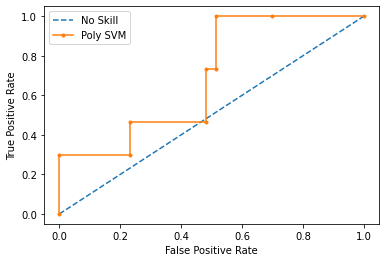

In [79]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Poly SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('poly_svm_fpr =',svm_fpr)
print('poly_svm_tpr =',svm_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 4. Sigmoid SVM

In [80]:
# Kernel sigmoid SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='sigmoid',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel sigmoid SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel sigmoid SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel sigmoid SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel sigmoid SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Kernel sigmoid SVM = 61.0%
Precision with Kernel sigmoid SVM = 64.0%
Recall with Kernel sigmoid SVM = 61.0%
F1_score with Kernel sigmoid SVM = 61.6%


col_0,0,1
row_0,,
0,73,40
1,77,110


Sigmoid SVM: precision =  [0.66079295 0.58823529 0.6043956  0.49295775 0.66666667 0.5625
 1.         1.        ]
Sigmoid SVM: recall =  [1.         0.73333333 0.73333333 0.46666667 0.46666667 0.3
 0.3        0.        ]


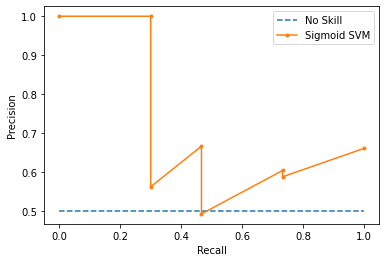

In [81]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Sigmoid SVM: precision = ",svm_precision)
print("Sigmoid SVM: recall = ",svm_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
Sigmoid SVM : ROC AUC = 0.6962222222222223
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
sigmoid_svm_fpr = [0.         0.         0.23333333 0.23333333 0.48       0.48
 0.51333333 0.51333333 0.7        1.        ]
sigmoid_svm_tpr = [0.         0.3        0.3        0.46666667 0.46666667 0.73333333
 0.73333333 1.         1.         1.        ]


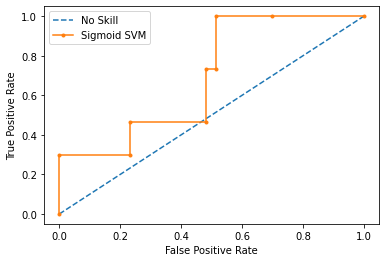

In [82]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Sigmoid SVM : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('sigmoid_svm_fpr =',svm_fpr)
print('sigmoid_svm_tpr =',svm_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2) Using PCA for SVM on the testing data

In [83]:
pca = PCA(svd_solver='full',n_components=1)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [84]:
# Linear SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='linear',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Linear SVM after PCA = 65.0%
Precision with Linear SVM after PCA = 89.5%
Recall with Linear SVM after PCA = 65.0%
F1_score with Linear SVM after PCA = 69.9%


col_0,0,1
row_0,,
0,45,0
1,105,150


In [85]:
# Kernel RBF SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='rbf',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Accuracy with Kernel RBF SVM after PCA = 50.0%
Precision with Kernel RBF SVM after PCA = 100.0%
Recall with Kernel RBF SVM after PCA = 50.0%
F1_score with Kernel RBF SVM after PCA = 66.7%


col_0,0,1
row_0,,
0,150,150


In [86]:
# Kernel poly SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='poly',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel poly SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel poly SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel poly SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel poly SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Kernel poly SVM after PCA = 65.0%
Precision with Kernel poly SVM after PCA = 89.5%
Recall with Kernel poly SVM after PCA = 65.0%
F1_score with Kernel poly SVM after PCA = 69.9%


col_0,0,1
row_0,,
0,45,0
1,105,150


In [87]:
# Kernel sigmoid SVM
model = SVC(C=0.1,degree=1, random_state=0,gamma='auto', kernel='sigmoid',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel sigmoid SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel sigmoid SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel sigmoid SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel sigmoid SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Kernel sigmoid SVM after PCA = 51.7%
Precision with Kernel sigmoid SVM after PCA = 61.1%
Recall with Kernel sigmoid SVM after PCA = 51.7%
F1_score with Kernel sigmoid SVM after PCA = 54.0%


col_0,0,1
row_0,,
0,45,40
1,105,110


## 3) Using K-NN on the testing data 

In [88]:
# K-NN
model = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='minkowski')
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with K-NN = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with K-NN = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with K-NN = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with K-NN = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with K-NN = 73.3%
Precision with K-NN = 87.6%
Recall with K-NN = 73.3%
F1_score with K-NN = 75.4%


col_0,0,1
row_0,,
0,150,80
1,0,70


KNN: precision =  [0.5 1.  1. ]
KNN: recall =  [1.         0.46666667 0.        ]


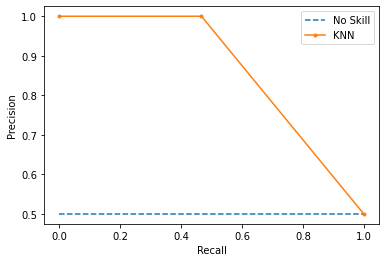

In [89]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
knn_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
y_predict=model.predict(X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
# summarize scores
print("KNN: precision = ",knn_precision)
print("KNN: recall = ",knn_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(knn_recall, knn_precision, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
KNN : ROC AUC = 0.7333333333333334
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
knn_fpr = [0. 0. 1.]
knn_tpr = [0. 0. 1.]


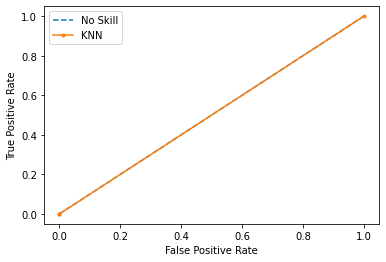

In [90]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
knn_auc=roc_auc_score(y_test,knn_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('KNN : ROC AUC =',knn_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('knn_fpr =',knn_fpr)
print('knn_tpr =',knn_fpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr, knn_fpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4) Using PCA for K-NN on the testing data

In [91]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='minkowski')
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with K-NN after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with K-NN after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with K-NN after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with K-NN after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Accuracy with K-NN after PCA = 76.7%
Precision with K-NN after PCA = 87.6%
Recall with K-NN after PCA = 76.7%
F1_score with K-NN after PCA = 78.0%


col_0,0,1
row_0,,
0,150,70
1,0,80


## 5) Using Logistic Regression on the testing data

In [92]:
model = LogisticRegression()
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Logistic Regression = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Logistic Regression = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Logistic Regression = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Logistic Regression = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with Logistic Regression = 73.3%
Precision with Logistic Regression = 87.6%
Recall with Logistic Regression = 73.3%
F1_score with Logistic Regression = 75.4%


col_0,0,1
row_0,,
0,150,80
1,0,70


LR: precision =  [1. 1. 1. 1. 1.]
LR: recall =  [1.         0.73333333 0.46666667 0.3        0.        ]


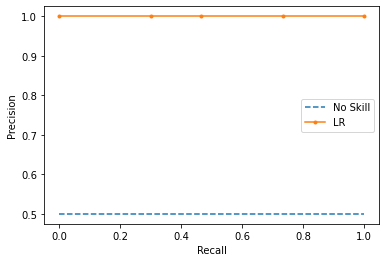

In [93]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
y_predict=model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# summarize scores
print("LR: precision = ",lr_precision)
print("LR: recall = ",lr_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LR')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
LR : ROC AUC = 1.0
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
lr_fpr = [0.         0.         0.         0.         0.23333333 0.48
 0.51333333 0.7        1.        ]
lr_tpr = [0.         0.3        0.46666667 1.         1.         1.
 1.         1.         1.        ]


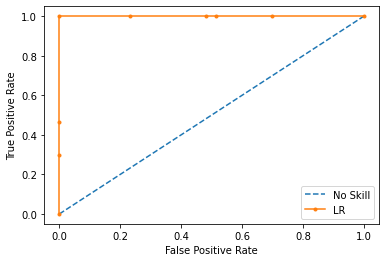

In [94]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('LR : ROC AUC =',lr_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('lr_fpr =',lr_fpr)
print('lr_tpr =',lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 6) Using ANN on the testing data

In [95]:
model = MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='adam',alpha=0.01,batch_size='auto',
                      learning_rate='constant',learning_rate_init=0.001,random_state=0)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with MLP Classifier = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with MLP Classifier = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with MLP Classifier = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with MLP Classifier = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy with MLP Classifier = 73.3%
Precision with MLP Classifier = 87.6%
Recall with MLP Classifier = 73.3%
F1_score with MLP Classifier = 75.4%


col_0,0,1
row_0,,
0,150,80
1,0,70


ANN: precision =  [0.84269663 0.84180791 0.79710145 0.99099099 1.         1.
 1.        ]
ANN: recall =  [1.         0.99333333 0.73333333 0.73333333 0.73333333 0.46666667
 0.        ]


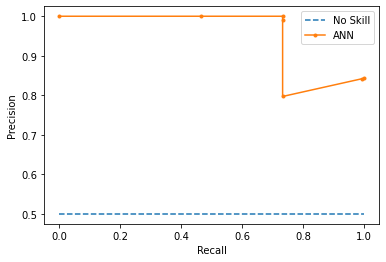

In [96]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
ann_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ann_probs = ann_probs[:, 1]
y_predict=model.predict(X_test)
ann_precision, ann_recall, _ = precision_recall_curve(y_test, ann_probs)
# summarize scores
print("ANN: precision = ",ann_precision)
print("ANN: recall = ",ann_recall)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(ann_recall, ann_precision, marker='.', label='ANN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC = 0.5
ANN : ROC AUC = 0.6962222222222223
ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
ann_fpr = [0.         0.         0.         0.00666667 0.18666667 0.18666667
 0.18666667 0.42       0.45333333 0.75333333 0.99333333 1.        ]
ann_tpr = [0.         0.46666667 0.73333333 0.73333333 0.73333333 0.99333333
 1.         1.         1.         1.         1.         1.        ]


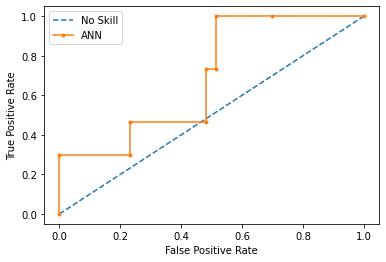

In [97]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
ann_auc=roc_auc_score(y_test,ann_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('ANN : ROC AUC =',svm_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('ann_fpr =',ann_fpr)
print('ann_tpr =',ann_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='ANN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()